## Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [4]:
train_path = 'dataset/TRAIN'
test_path = 'dataset/TEST'

In [9]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [14]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [03:10<00:00, 52.43it/s]


In [15]:
data.shape

(22564, 2)

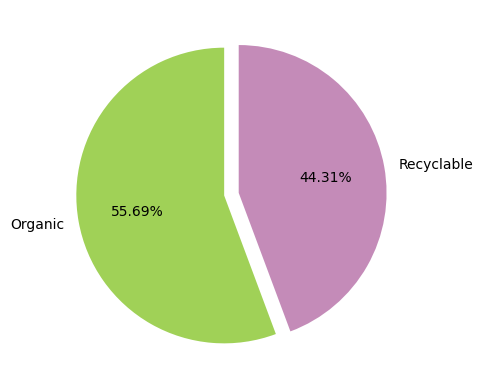

In [16]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels = ['Organic', 'Recyclable'], autopct = '%0.2f%%',
         colors = colors, startangle = 90, explode = [0.05, 0.05])     
plt.show()  

                                               image    label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O
label
TRAIN\O    12565
TRAIN\R     9999
Name: count, dtype: int64


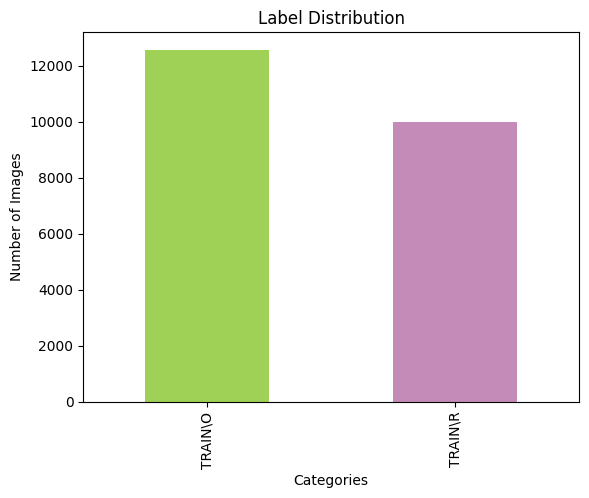

In [19]:
# Check the first few rows of the DataFrame
print(data.head())

# Check the distribution of the labels
print(data['label'].value_counts())

# Plot the distribution of labels as a bar chart
data['label'].value_counts().plot(kind='bar', color=['#a0d157', '#c48bb8'])
plt.title('Label Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()


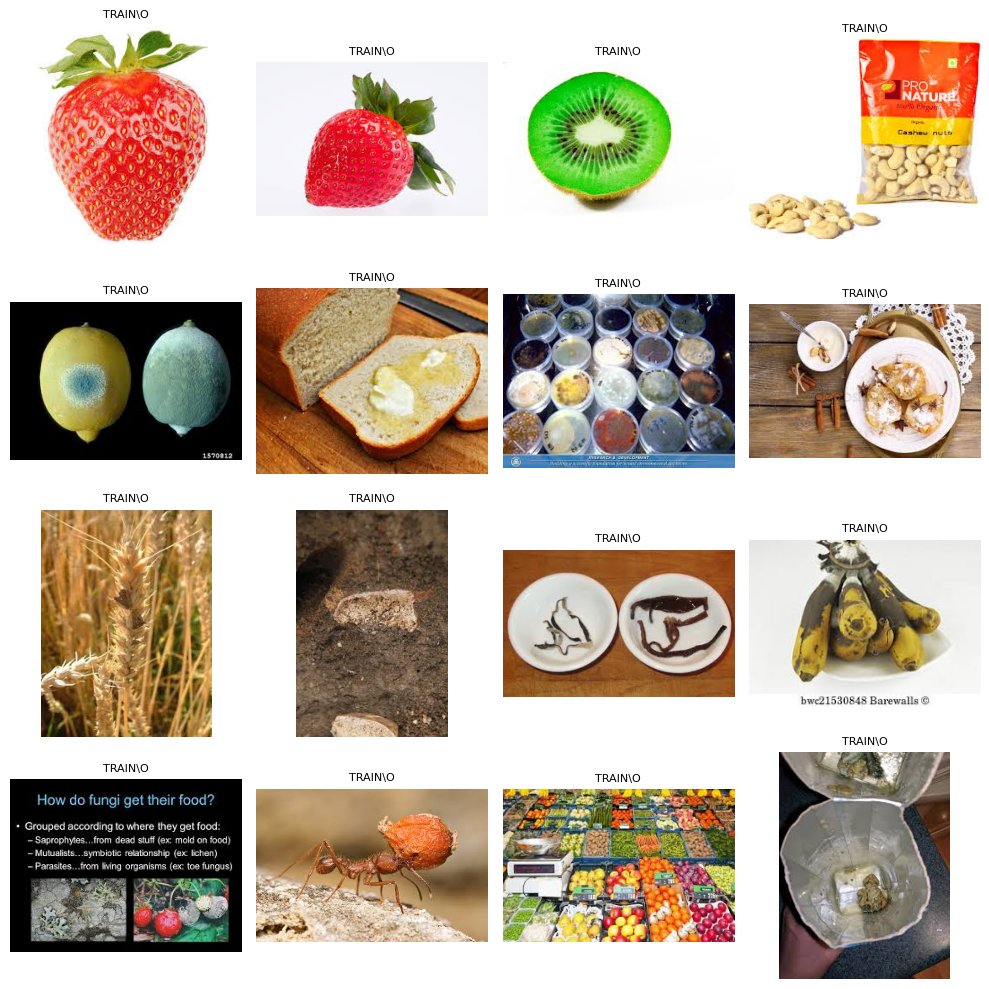

In [22]:
import matplotlib.pyplot as plt

# Display a grid of 16 images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_data[i])
    plt.title(y_data[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


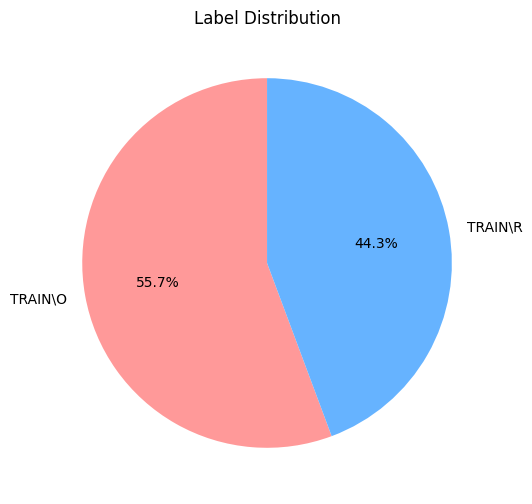

In [23]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
data['label'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    figsize=(6, 6)
)
plt.title('Label Distribution')
plt.ylabel('')  # Remove the y-axis label for aesthetics
plt.show()

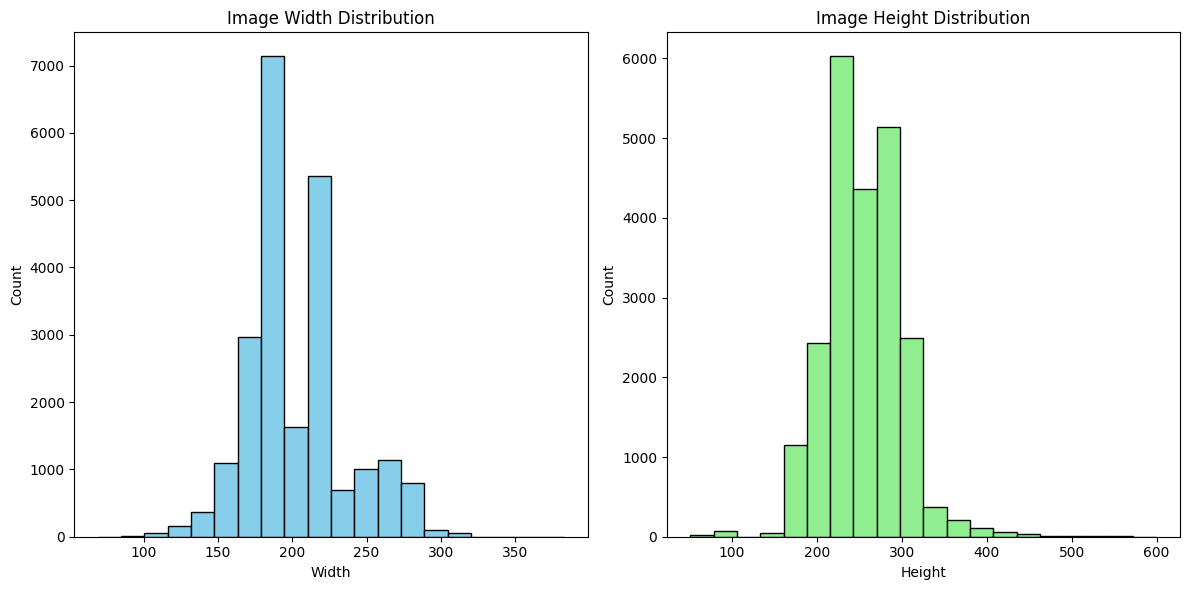

In [24]:
image_shapes = [img.shape[:2] for img in data['image']]
widths, heights = zip(*image_shapes)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
